<a href="https://colab.research.google.com/github/Kinlv01/Ciencias/blob/main/Kopia_de_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 48.6 MB/s eta 0:00:00


KIN KINNI

In [4]:
import pandas as pd
import mysql.connector
import torch
import torch.nn as nn
import torch.optim as optim

# Paso 1: Conectar a la base de datos MySQL
mydb = mysql.connector.connect(
    host="hpc-matematicas-z.fciencias.unam.mx",          # Cambiar si es un servidor remoto
    user="JimmyNeutron",         # Reemplazar con tu usuario de MySQL
    password="CarlSheen",  # Reemplazar con tu contraseña de MySQL
    database="LIMONADA"       # Reemplazar con el nombre de tu base de datos
)

# Paso 2: Leer los datos de la tabla VENTAS en un DataFrame
query = "SELECT fin_semana, soleado, caluroso, quincena, precio, vendidos FROM VENTAS"
df = pd.read_sql(query, mydb)

# Calcular la media y desviación estándar de 'vendidos'
numSoldMean = df['vendidos'].mean()
numSoldStd = df['vendidos'].std()

# Estandarizar 'vendidos' (normalizar)
df['vendidos'] = (df['vendidos'] - numSoldMean) / numSoldStd


# Paso 3: Mostrar las primeras filas para asegurarnos de que todo está bien
print("Primeras filas del DataFrame:")
print(df.head())

 #Asumiendo que 'df' ya tiene los datos y están estandarizados

# Entradas (x): 'Fin de semana', 'Soleado', 'Cálido', 'Gran señal', 'Precio'
# Salidas (y): 'Vendidos'
x = df[['fin_semana', 'soleado', 'caluroso', 'quincena', 'precio']].values
y = df['vendidos'].values

# Convertimos a tensores de PyTorch
x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Asegúrate de que los datos están en el dispositivo adecuado (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x, y = x.to(device), y.to(device)


<ipython-input-4-f43ae97261c8>:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, mydb)


Primeras filas del DataFrame:
   fin_semana  soleado  caluroso  quincena  precio  vendidos
0           1        0         0         1       9 -0.023669
1           1        1         1         0      10  0.743734
2           0        1         0         0      10 -0.849208
3           1        0         0         1       6  0.394915
4           1        0         0         1       8  0.080977


In [8]:
import pandas as pd
import mysql.connector
import torch
import torch.nn as nn
import torch.optim as optim

# Paso 1: Conectar a la base de datos MySQL
mydb = mysql.connector.connect(
    host="hpc-matematicas-z.fciencias.unam.mx",          # Cambiar si es un servidor remoto
    user="JimmyNeutron",         # Reemplazar con tu usuario de MySQL
    password="CarlSheen",  # Reemplazar con tu contraseña de MySQL
    database="LIMONADA"       # Reemplazar con el nombre de tu base de datos
)

# Paso 2: Leer los datos de la tabla VENTAS en un DataFrame
query = "SELECT id_venta,fin_semana, soleado, caluroso, quincena, precio, vendidos FROM VENTAS"
df = pd.read_sql(query, mydb)

# Calcular la media y desviación estándar de 'vendidos'
#numSoldMean = df['vendidos'].mean()
#numSoldStd = df['vendidos'].std()

# Estandarizar 'vendidos' (normalizar)
#df['vendidos'] = (df['vendidos'] - numSoldMean) / numSoldStd


# Paso 3: Mostrar las primeras filas para asegurarnos de que todo está bien
#print("Primeras filas del DataFrame:")
#print(df.head())

 #Asumiendo que 'df' ya tiene los datos y están estandarizados

# Entradas (x): 'Fin de semana', 'Soleado', 'Cálido', 'Gran señal', 'Precio'
# Salidas (y): 'Vendidos'
#x = df[['id_venta', 'fin_semana', 'soleado', 'caluroso', 'quincena', 'precio']].values
#y = df['vendidos'].values

# Convertimos a tensores de PyTorch
#x = torch.tensor(x, dtype=torch.float32)
#y = torch.tensor(y, dtype=torch.float32)

# Asegúrate de que los datos están en el dispositivo adecuado (CPU o GPU)
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#x, y = x.to(device), y.to(device)


<ipython-input-8-8b2c2cd7ae64>:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, mydb)


In [9]:
# Definir la red neuronal
model = nn.Sequential(
    nn.Linear(5, 100),  # 5 entradas (características), 100 unidades en la capa oculta
    nn.ReLU(),  # Función de activación ReLU
    nn.Linear(100, 1)  # Capa de salida con 1 unidad (número de limonadas vendidas)
)

model.to(device)  # Mover el modelo al dispositivo (CPU o GPU)

# Definir el criterio (pérdida) y el optimizador
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Ciclo de entrenamiento
pruebas = 5  # Número de épocas
for prueba in range(pruebas):
    total_perdida = 0
    for i in range(len(x)):
        # Forward pass
        y_pred = model(x[i].view(1, -1))  # Hacer predicción

        # Calcular la pérdida
        perdida = criterion(y_pred, y[i].view(1, -1))

        # Retropropagación
        optimizer.zero_grad()
        perdida.backward()
        optimizer.step()

        total_perdida += perdida.item()

    print(f'Tiempo {prueba + 1}/{pruebas}, Pérdida total: {total_perdida}')


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x6 and 5x100)

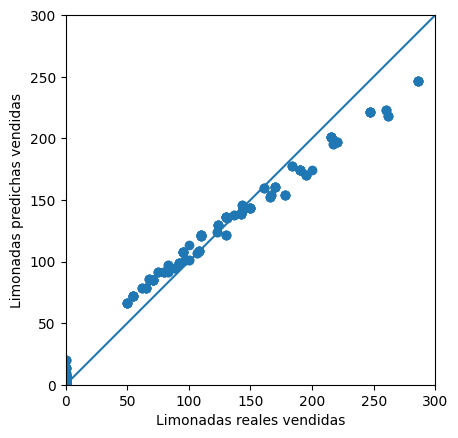

In [ ]:
import matplotlib.pyplot as plt

@torch.no_grad()
def grafPredicciones(model, x, y, minValue, maxValue):
    model.eval()  # Establecer el modelo en modo de inferencia

    predicciones = []  # Seguir predicciones
    reales = []  # Seguir las etiquetas reales

    x.to(device)
    y.to(device)
    model.to(device)

    for i in range(len(x)):
        # Pase único hacia adelante
        pred = model(x[i].view(1, -1))  # Predicción

        # Denormalizar la predicción
        pred = pred * numSoldStd + numSoldMean  # Denormalizar la predicción
        real = y[i] * numSoldStd + numSoldMean  # Denormalizar la etiqueta real

        # Guardar la predicción y la etiqueta real
        predicciones.append(pred.item())
        reales.append(real.item())

    # Trazar valores reales vs. predicciones
    plt.scatter(reales, predicciones)
    plt.xlabel('Limonadas reales vendidas')
    plt.ylabel('Limonadas predichas vendidas')
    plt.plot([minValue, maxValue], [minValue, maxValue])
    plt.xlim(minValue, maxValue)
    plt.ylim(minValue, maxValue)

    # Hacer que la visualización sea igual en ambas dimensiones
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Llamada a la función de gráficos
grafPredicciones(model, x, y, 0, 300)

